<a href="https://colab.research.google.com/github/Annie-freitas/ArewaLadies4Tech.github.io/blob/main/Health_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING MODELS

In [255]:
# Importing models
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

DATA LOADING AND DATA PREPROCESSING

In [256]:
# URL to the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [257]:
# Fetch data from the URL
response = requests.get(url)

In [258]:
# Save to file
with open('processed_cleveland_data.csv', 'w') as file:
    file.write(response.text)

In [259]:
# Load into DataFrame
column_names = ["Age", "Sex", "Chest Pain", "Resting blood pressure", "Cholesterol", "Fasting blood sugar",
                "Resting electrocardiograph", "Tarchycardia", "Exercise-Induced angina", "Induced depression",
                "Slope of exercise", "Major vessels", "Thalassemia", "Diagnosis"]

In [260]:
# Load the dataset to csv file
df = pd.read_csv('processed_cleveland_data.csv', header=None, names=column_names)

In [261]:
# Display first few rows
df.head()

,Age,Sex,Chest Pain,Resting blood pressure,Cholesterol,Fasting blood sugar,Resting electrocardiograph,Tarchycardia,Exercise-Induced angina,Induced depression,Slope of exercise,Major vessels,Thalassemia,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [262]:
# Display the last few rows
df.tail()

,Age,Sex,Chest Pain,Resting blood pressure,Cholesterol,Fasting blood sugar,Resting electrocardiograph,Tarchycardia,Exercise-Induced angina,Induced depression,Slope of exercise,Major vessels,Thalassemia,Diagnosis
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


EXPLORATORY DATA ANALYSIS

In [263]:
# Remove all ? and replace with null
df.replace('?', np.nan, inplace = True)

In [264]:
# Display the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         303 non-null    float64
 1   Sex                         303 non-null    float64
 2   Chest Pain                  303 non-null    float64
 3   Resting blood pressure      303 non-null    float64
 4   Cholesterol                 303 non-null    float64
 5   Fasting blood sugar         303 non-null    float64
 6   Resting electrocardiograph  303 non-null    float64
 7   Tarchycardia                303 non-null    float64
 8   Exercise-Induced angina     303 non-null    float64
 9   Induced depression          303 non-null    float64
 10  Slope of exercise           303 non-null    float64
 11  Major vessels               299 non-null    object 
 12  Thalassemia                 301 non-null    object 
 13  Diagnosis                   303 non

In [265]:
# Display the data shape
df.shape

(303, 14)

In [266]:
# Display the data size
df.size

4242

In [267]:
# Checking for nulls
df.isnull().sum()

,0
Age,0
Sex,0
Chest Pain,0
Resting blood pressure,0
Cholesterol,0
Fasting blood sugar,0
Resting electrocardiograph,0
Tarchycardia,0
Exercise-Induced angina,0
Induced depression,0


In [268]:
# Filing in the Major vessels with mean
df["Major vessels"] = pd.to_numeric(df["Major vessels"], errors="coerce")
df["Major vessels"].fillna(df["Major vessels"].mean(), inplace = True)

In [269]:

# Filing in Thalassemia with mean
df["Thalassemia"] = pd.to_numeric(df["Thalassemia"], errors="coerce")
df["Thalassemia"].fillna(df["Thalassemia"].mean(), inplace = True)

In [270]:
# Checking for duplicates
df.duplicated().sum()

0

VISUALIZATING EXPLORATORY DATA ANALYSIS

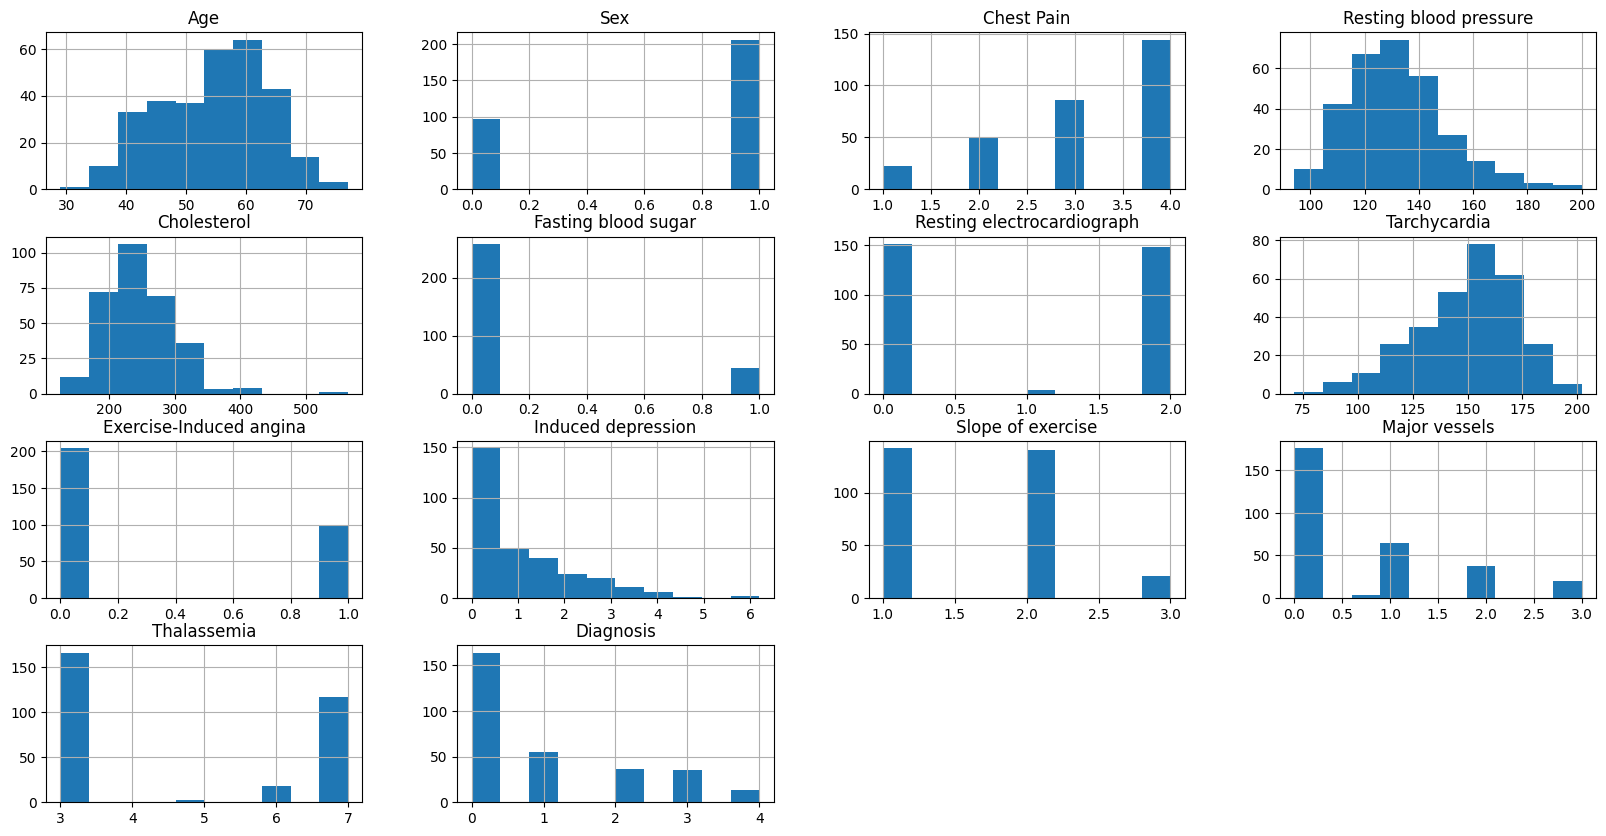

In [271]:
# Visualing the features and Target
df.hist(figsize=(20,10))
plt.show()

In [272]:
# Correlation Matrix
correlation_matrix = df.corr()
correlation_matrix

,Age,Sex,Chest Pain,Resting blood pressure,Cholesterol,Fasting blood sugar,Resting electrocardiograph,Tarchycardia,Exercise-Induced angina,Induced depression,Slope of exercise,Major vessels,Thalassemia,Diagnosis
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.222853
Sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.224469
Chest Pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.407075
Resting blood pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.157754
Cholesterol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.070909
Fasting blood sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.059186
Resting electrocardiograph,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.183696
Tarchycardia,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.415040
Exercise-Induced angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.397057
Induced depression,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.504092


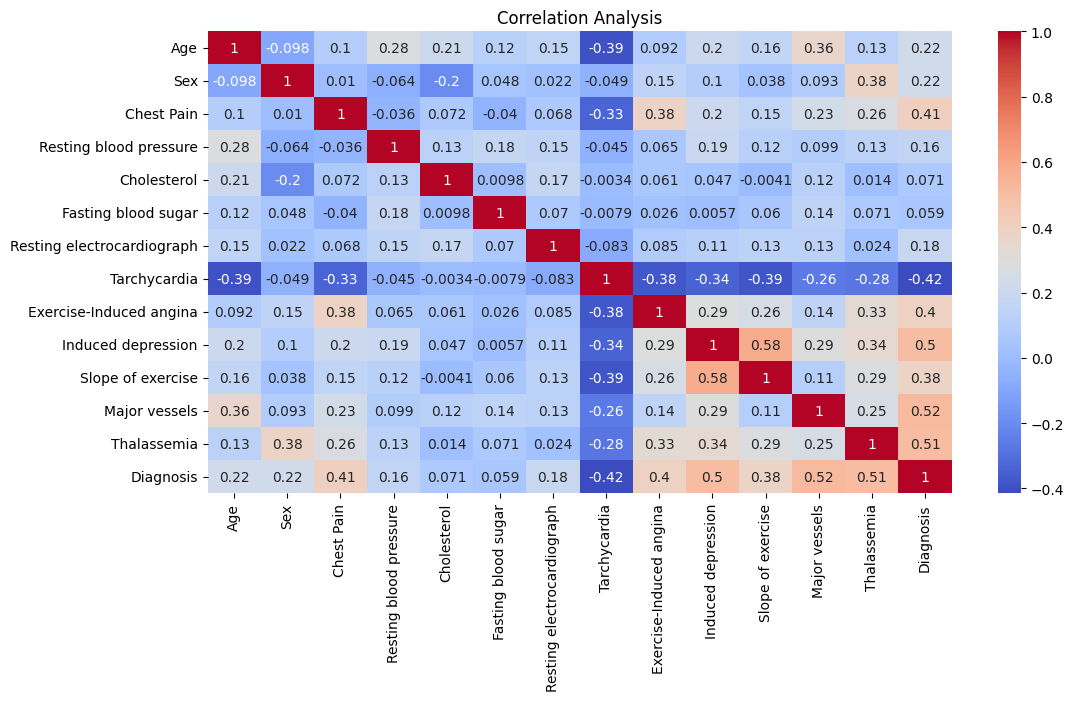

In [273]:
# Visualizing Correlation Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

<ipython-input-274-5e74a5bfbbdf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis',data=df, palette='Set2')


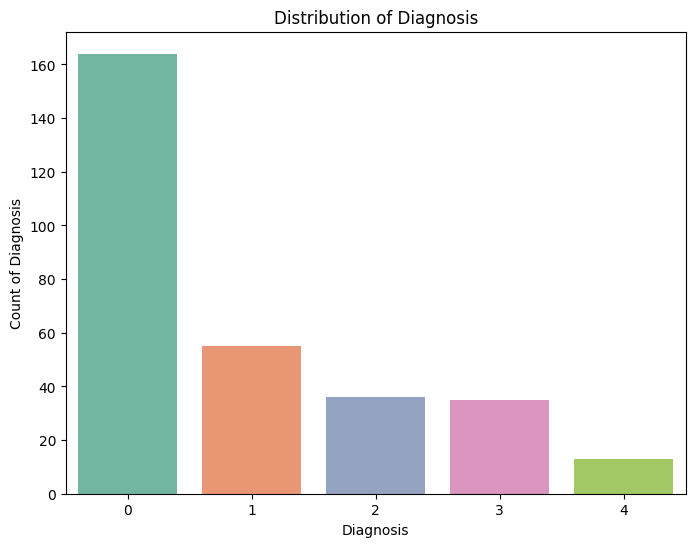

In [274]:
# Visualizing the Distribution of Diagnosis
plt.figure(figsize=(8,6))
sns.countplot(x='Diagnosis',data=df, palette='Set2')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count of Diagnosis')
plt.show()

FEATURES ENGINEERING

In [275]:
# Creating age categories
df['age_category'] = pd.cut(df['Age'], bins= [29, 39, 49, 59, 69, 79], labels= ['30-39', '40-49', '50-59', '60-69', '70-79'], right=False)

In [276]:
# Creating cholesterol levels as categories
df['cholesterol_category'] = pd.cut(df['Cholesterol'], bins=[0, 200, 240, 600], labels=['Normal', 'Borderline', 'High'])

In [277]:
# Standardizating the document
label_encoder = LabelEncoder()
df['cholesterol_category'] = label_encoder.fit_transform(df['cholesterol_category'])
df['age_category'] = label_encoder.fit_transform(df['age_category'])

In [278]:
# Determining X and y
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [279]:
# Calling Random forest model
model = RandomForestClassifier(random_state = 0)

In [280]:
# Calling Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=5)

In [281]:
# Fitting Recursive Feature Elimination
fit = rfe.fit(X, y)

In [282]:
# Selecting Features
features = X.columns[fit.support_]
features

Index(['Age', 'Resting blood pressure', 'Cholesterol', 'Tarchycardia',
       'Induced depression'],
      dtype='object')

MODEL SELECTION, TRAINING AND EVALUATION

In [283]:
# Splitting Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [284]:
# Fitting logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [285]:
# Cross validation of logistic regression
lr_cross = cross_val_score(model_lr, X, y, cv=5)
lr_cross

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.63934426, 0.62295082, 0.54098361, 0.56666667, 0.58333333])

In [286]:
# Predicting  logistic regression
pred_lr = model_lr.predict(X_test)
pred_lr

array([0, 0, 0, 1, 1, 3, 2, 3, 0, 0, 0, 0, 1, 3, 2, 0, 0, 1, 2, 0, 1, 0,
       3, 0, 3, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0,
       1, 3, 1])

In [287]:
# Model evaluation of logistic regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, pred_lr,average='macro'))
print("Logistic Regression Recall:", recall_score(y_test, pred_lr, average='macro'))
print("Logistic Regression F1 Score:", f1_score(y_test, pred_lr, average='macro'))
print("Logistic Regression ROC_AUC:", roc_auc_score(y_test, model_lr.predict_proba(X_test), multi_class="ovr"))

Logistic Regression Accuracy: 0.5934065934065934
Logistic Regression Precision: 0.3534905660377358
Logistic Regression Recall: 0.3720588235294118
Logistic Regression F1 Score: 0.3563366336633663
Logistic Regression ROC_AUC: 0.7856470888548764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [288]:
# Fitting Random Forest
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [289]:
# Cross validation of Random Forest
rfc_cross = cross_val_score(model_rfc, X, y, cv=5)
rfc_cross

array([0.60655738, 0.62295082, 0.54098361, 0.56666667, 0.56666667])

In [290]:
# Predicting Random Forest
pred_rfc = model_lr.predict(X_test)
pred_rfc

array([0, 0, 0, 1, 1, 3, 2, 3, 0, 0, 0, 0, 1, 3, 2, 0, 0, 1, 2, 0, 1, 0,
       3, 0, 3, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0,
       1, 3, 1])

In [291]:
# Model evaluation of Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rfc))
print("Random Forest Precision:", precision_score(y_test, pred_rfc,average='macro'))
print("Random Forest Recall:", recall_score(y_test, pred_rfc, average='macro'))
print("Random Forest F1 Score:", f1_score(y_test, pred_rfc, average='macro'))
print("Random Forest ROC_AUC:", roc_auc_score(y_test, model_rfc.predict_proba(X_test), multi_class="ovr"))

Random Forest Accuracy: 0.5934065934065934
Random Forest Precision: 0.3534905660377358
Random Forest Recall: 0.3720588235294118
Random Forest F1 Score: 0.3563366336633663
Random Forest ROC_AUC: 0.7827872866106772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [292]:
# Fitting Decision Tree
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [293]:
# Cross validation of Decision Tree
dtc_cross = cross_val_score(model_dtc, X, y, cv=5)
dtc_cross

array([0.40983607, 0.59016393, 0.54098361, 0.4       , 0.5       ])

In [294]:
# Predicting Decision Tree
pred_dtc = model_dtc.predict(X_test)
pred_dtc

array([0, 2, 2, 1, 1, 4, 3, 3, 0, 1, 0, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 0, 3, 0, 1, 0, 2, 0, 3, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0,
       0, 4, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 3,
       0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       3, 1, 1])

In [295]:
# Model evaluation of Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dtc))
print("Decision Tree Precision:", precision_score(y_test, pred_dtc,average='macro'))
print("Decision Tree Recall:", recall_score(y_test, pred_dtc, average='macro'))
print("Decision Tree F1 Score:", f1_score(y_test, pred_dtc, average='macro'))
print("Decision Tree ROC_AUC:", roc_auc_score(y_test, model_dtc.predict_proba(X_test), multi_class="ovr"))

Decision Tree Accuracy: 0.43956043956043955
Decision Tree Precision: 0.25433171479683103
Decision Tree Recall: 0.2503921568627451
Decision Tree F1 Score: 0.24939805474962795
Decision Tree ROC_AUC: 0.5475204675225843
